In [63]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os
import pickle
import tqdm

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error,  r2_score, mean_absolute_error

In [111]:
# location = '/Users/johanjun/Documents/2021/seoul_bike_share/data/df_address_join.pkl'
# with open(location, 'rb') as f:
#     raw_all = pickle.load(f)
# raw_all

,rent_date,rent_hour,station_no,station_name,rent_type,sex,age_type,rent_count,momentum,green,distance,use_hour,address,gu
0,2021-01-01,0.00,1347,1347. 길음래미안아파트817동 상가 앞,정기권,,~10대,2.00,28.90,0.23,992.78,13.00,서울특별시 성북구 길음로 33,성북구
1,2021-01-01,0.00,1347,1347. 길음래미안아파트817동 상가 앞,정기권,,20대,1.00,11.24,0.07,283.72,1.00,서울특별시 성북구 길음로 33,성북구
2,2021-01-01,2.00,1347,1347. 길음래미안아파트817동 상가 앞,일일권,,20대,1.00,42.24,0.43,"1,839.04",37.00,서울특별시 성북구 길음로 33,성북구
3,2021-01-01,2.00,1347,1347. 길음래미안아파트817동 상가 앞,일일권,M,20대,2.00,50.75,0.44,"1,912.72",73.00,서울특별시 성북구 길음로 33,성북구
4,2021-01-01,5.00,1347,1347. 길음래미안아파트817동 상가 앞,일일권,M,~10대,1.00,183.65,1.66,"7,134.79",47.00,서울특별시 성북구 길음로 33,성북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720131,NaN,NaN,3304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,남부순환로 1917,관악구
720132,NaN,NaN,3305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,남부순환로 1939,관악구
720133,NaN,NaN,2263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 서초구 바우뫼로 43,서초구
720134,NaN,NaN,2543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서초구 동작대로 164,서초구


In [112]:
raw_all.describe(include='all')

,rent_date,rent_hour,station_no,station_name,rent_type,sex,age_type,rent_count,momentum,green,distance,use_hour,address,gu
count,720123,"720,123.00","720,136.00",720123,720123,720123,720123,"720,123.00","720,123.00","720,123.00","720,123.00","720,123.00",717603,717603
unique,30,NaN,NaN,2188,4,5,7,NaN,NaN,NaN,NaN,NaN,2068,25
top,2021-01-25,NaN,NaN,583. 청계천 생태교실 앞,정기권,,20대,NaN,NaN,NaN,NaN,NaN,서울특별시 성동구 마장로39길 51,강서구
freq,47402,NaN,NaN,2532,585993,318154,270494,NaN,NaN,NaN,NaN,NaN,2532,65702
mean,NaN,14.20,"1,445.81",NaN,NaN,NaN,NaN,1.09,81.75,0.71,"3,042.29",28.11,NaN,NaN
std,NaN,5.24,"1,015.02",NaN,NaN,NaN,NaN,0.34,117.69,1.00,"4,291.63",33.28,NaN,NaN
min,NaN,0.00,3.00,NaN,NaN,NaN,NaN,1.00,0.00,0.00,0.00,0.00,NaN,NaN
25%,NaN,11.00,593.00,NaN,NaN,NaN,NaN,1.00,20.73,0.18,789.60,8.00,NaN,NaN
50%,NaN,15.00,"1,228.00",NaN,NaN,NaN,NaN,1.00,44.75,0.39,"1,682.76",16.00,NaN,NaN
75%,NaN,18.00,"2,113.00",NaN,NaN,NaN,NaN,1.00,95.76,0.83,"3,580.00",37.00,NaN,NaN


In [113]:
raw_all = raw_all.dropna(subset=['rent_hour'])

In [114]:
raw_all.shape

(720123, 14)

In [115]:
raw_all['rent_hour'] = raw_all['rent_hour'].apply(lambda x : int(x))

In [116]:
if 'rent_date' in raw_all.columns:
    raw_all['rent_date'] = pd.to_datetime(raw_all['rent_date'])
    raw_all['DateTime'] = pd.to_datetime(raw_all['rent_date'])
raw_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720123 entries, 0 to 720122
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   rent_date     720123 non-null  datetime64[ns]
 1   rent_hour     720123 non-null  int64         
 2   station_no    720123 non-null  int64         
 3   station_name  720123 non-null  object        
 4   rent_type     720123 non-null  object        
 5   sex           720123 non-null  object        
 6   age_type      720123 non-null  object        
 7   rent_count    720123 non-null  float64       
 8   momentum      720123 non-null  float64       
 9   green         720123 non-null  float64       
 10  distance      720123 non-null  float64       
 11  use_hour      720123 non-null  float64       
 12  address       717590 non-null  object        
 13  gu            717590 non-null  object        
 14  DateTime      720123 non-null  datetime64[ns]
dtypes: datetime64[ns]

In [121]:
for i, v in enumerate(raw_all['rent_date']):
    raw_all['rent_date'][i] = raw_all['rent_date'][i].replace(hour=raw_all['rent_hour'][i])
    if i % 10000 == 0:
        print(i)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000


In [122]:
raw_all.tail()

,rent_date,rent_hour,station_no,station_name,rent_type,sex,age_type,rent_count,momentum,green,distance,use_hour,address,gu,DateTime
720118,2021-01-25 19:00:00,19,3878,3878. 장로회신학대학교 주기철 기념관,일일권,,20대,1.00,76.28,0.69,"2,963.57",53.00,NaN,NaN,2021-01-25
720119,2021-01-25 19:00:00,19,3878,3878. 장로회신학대학교 주기철 기념관,일일권,F,20대,2.00,105.18,0.99,"4,278.46",107.00,NaN,NaN,2021-01-25
720120,2021-01-27 13:00:00,13,3878,3878. 장로회신학대학교 주기철 기념관,정기권,,20대,1.00,73.45,0.51,"2,182.24",13.00,NaN,NaN,2021-01-27
720121,2021-01-30 16:00:00,16,3878,3878. 장로회신학대학교 주기철 기념관,일일권,,20대,1.00,49.69,0.49,"2,091.34",16.00,NaN,NaN,2021-01-30
720122,2021-01-31 18:00:00,18,3878,3878. 장로회신학대학교 주기철 기념관,일일권,M,20대,1.00,70.66,0.69,"2,973.84",20.00,NaN,NaN,2021-01-31


In [128]:
raw_all.set_index('rent_date', inplace=True)

In [129]:
raw_all

,rent_hour,station_no,station_name,rent_type,sex,age_type,rent_count,momentum,green,distance,use_hour,address,gu
rent_date,,,,,,,,,,,,,
2021-01-01 00:00:00,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,,~10대,2.00,28.90,0.23,992.78,13.00,서울특별시 성북구 길음로 33,성북구
2021-01-01 00:00:00,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,,20대,1.00,11.24,0.07,283.72,1.00,서울특별시 성북구 길음로 33,성북구
2021-01-01 02:00:00,2,1347,1347. 길음래미안아파트817동 상가 앞,일일권,,20대,1.00,42.24,0.43,"1,839.04",37.00,서울특별시 성북구 길음로 33,성북구
2021-01-01 02:00:00,2,1347,1347. 길음래미안아파트817동 상가 앞,일일권,M,20대,2.00,50.75,0.44,"1,912.72",73.00,서울특별시 성북구 길음로 33,성북구
2021-01-01 05:00:00,5,1347,1347. 길음래미안아파트817동 상가 앞,일일권,M,~10대,1.00,183.65,1.66,"7,134.79",47.00,서울특별시 성북구 길음로 33,성북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25 19:00:00,19,3878,3878. 장로회신학대학교 주기철 기념관,일일권,,20대,1.00,76.28,0.69,"2,963.57",53.00,NaN,NaN
2021-01-25 19:00:00,19,3878,3878. 장로회신학대학교 주기철 기념관,일일권,F,20대,2.00,105.18,0.99,"4,278.46",107.00,NaN,NaN
2021-01-27 13:00:00,13,3878,3878. 장로회신학대학교 주기철 기념관,정기권,,20대,1.00,73.45,0.51,"2,182.24",13.00,NaN,NaN


In [137]:
raw_all.isnull().sum()

rent_hour          0
station_no         0
station_name       0
rent_type          0
sex                0
age_type           0
rent_count         0
momentum           0
green              0
distance           0
use_hour           0
address         2533
gu              2533
dtype: int64

In [138]:
raw_all.index

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 00:00:00',
               '2021-01-01 02:00:00', '2021-01-01 02:00:00',
               '2021-01-01 05:00:00', '2021-01-01 12:00:00',
               '2021-01-01 12:00:00', '2021-01-01 14:00:00',
               '2021-01-01 14:00:00', '2021-01-01 15:00:00',
               ...
               '2021-01-31 18:00:00', '2021-01-24 10:00:00',
               '2021-01-24 11:00:00', '2021-01-24 15:00:00',
               '2021-01-25 18:00:00', '2021-01-25 19:00:00',
               '2021-01-25 19:00:00', '2021-01-27 13:00:00',
               '2021-01-30 16:00:00', '2021-01-31 18:00:00'],
              dtype='datetime64[ns]', name='rent_date', length=720123, freq=None)

In [21]:
raw_all['DateTime'] = raw_all.index
raw_all.head(10)

,rent_hour,station_no,station_name,rent_type,sex,age_type,rent_count,momentum,green,distance,use_hour,address,gu,DateTime
rent_date,,,,,,,,,,,,,,
2021-01-01 00:00:00,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,,~10대,2.00,28.90,0.23,992.78,13.00,서울특별시 성북구 길음로 33,성북구,2021-01-01 00:00:00
2021-01-01 00:00:00,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,,20대,1.00,11.24,0.07,283.72,1.00,서울특별시 성북구 길음로 33,성북구,2021-01-01 00:00:00
2021-01-01 02:00:00,2,1347,1347. 길음래미안아파트817동 상가 앞,일일권,,20대,1.00,42.24,0.43,"1,839.04",37.00,서울특별시 성북구 길음로 33,성북구,2021-01-01 02:00:00
2021-01-01 02:00:00,2,1347,1347. 길음래미안아파트817동 상가 앞,일일권,M,20대,2.00,50.75,0.44,"1,912.72",73.00,서울특별시 성북구 길음로 33,성북구,2021-01-01 02:00:00
2021-01-01 05:00:00,5,1347,1347. 길음래미안아파트817동 상가 앞,일일권,M,~10대,1.00,183.65,1.66,"7,134.79",47.00,서울특별시 성북구 길음로 33,성북구,2021-01-01 05:00:00
2021-01-01 12:00:00,12,1347,1347. 길음래미안아파트817동 상가 앞,일일권,,30대,1.00,27.95,0.33,"1,411.66",10.00,서울특별시 성북구 길음로 33,성북구,2021-01-01 12:00:00
2021-01-01 12:00:00,12,1347,1347. 길음래미안아파트817동 상가 앞,일일권,M,30대,1.00,51.62,0.38,"1,629.49",12.00,서울특별시 성북구 길음로 33,성북구,2021-01-01 12:00:00
2021-01-01 14:00:00,14,1347,1347. 길음래미안아파트817동 상가 앞,정기권,,40대,1.00,101.59,0.85,"3,664.92",93.00,서울특별시 성북구 길음로 33,성북구,2021-01-01 14:00:00
2021-01-01 14:00:00,14,1347,1347. 길음래미안아파트817동 상가 앞,정기권,M,50대,1.00,142.09,0.98,"4,221.47",29.00,서울특별시 성북구 길음로 33,성북구,2021-01-01 14:00:00


In [3]:
# with open('/Users/johanjun/Documents/2021/seoul_bike_share/TSA Study/data/raw_all(datetime preprocessing).pkl', 'wb') as f:
#     pickle.dump(raw_all, f)

with open('/Users/johanjun/Documents/2021/seoul_bike_share/TSA Study/data/raw_all(datetime preprocessing).pkl', 'rb') as f:
    raw_all = pickle.load(f)
raw_all.head()

,rent_hour,station_no,station_name,rent_type,sex,age_type,rent_count,momentum,green,distance,use_hour,address,gu,DateTime
rent_date,,,,,,,,,,,,,,
2021-01-01 00:00:00,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,,~10대,2.00,28.90,0.23,992.78,13.00,서울특별시 성북구 길음로 33,성북구,2021-01-01 00:00:00
2021-01-01 00:00:00,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,,20대,1.00,11.24,0.07,283.72,1.00,서울특별시 성북구 길음로 33,성북구,2021-01-01 00:00:00
2021-01-01 02:00:00,2,1347,1347. 길음래미안아파트817동 상가 앞,일일권,,20대,1.00,42.24,0.43,"1,839.04",37.00,서울특별시 성북구 길음로 33,성북구,2021-01-01 02:00:00
2021-01-01 02:00:00,2,1347,1347. 길음래미안아파트817동 상가 앞,일일권,M,20대,2.00,50.75,0.44,"1,912.72",73.00,서울특별시 성북구 길음로 33,성북구,2021-01-01 02:00:00
2021-01-01 05:00:00,5,1347,1347. 길음래미안아파트817동 상가 앞,일일권,M,~10대,1.00,183.65,1.66,"7,134.79",47.00,서울특별시 성북구 길음로 33,성북구,2021-01-01 05:00:00


---

In [227]:
raw_all_gangdong = raw_all[raw_all.gu == '강동구'].groupby(['DateTime'])['rent_count'].sum()
raw_all_gangdong.head()

DateTime
2021-01-01 00:00:00   14.00
2021-01-01 01:00:00   15.00
2021-01-01 02:00:00    7.00
2021-01-01 03:00:00    6.00
2021-01-01 04:00:00    6.00
Name: rent_count, dtype: float64

In [228]:
raw_all_gangdong = pd.DataFrame(raw_all_gangdong)
raw_all_gangdong.head()

,rent_count
DateTime,
2021-01-01 00:00:00,14.00
2021-01-01 01:00:00,15.00
2021-01-01 02:00:00,7.00
2021-01-01 03:00:00,6.00
2021-01-01 04:00:00,6.00


In [229]:
raw_all_gangdong.asfreq('H').isnull().sum()

rent_count    28
dtype: int64

In [230]:
raw_all_gangdong.asfreq('H')[raw_all_gangdong.asfreq('H').isnull().sum(axis=1) > 0]

,rent_count
DateTime,
2021-01-08 02:00:00,NaN
2021-01-12 23:00:00,NaN
2021-01-13 01:00:00,NaN
2021-01-13 02:00:00,NaN
2021-01-21 00:00:00,NaN
2021-01-21 01:00:00,NaN
2021-01-21 02:00:00,NaN
2021-01-21 03:00:00,NaN
2021-01-21 04:00:00,NaN


In [232]:
raw_all_gangdong = raw_all_gangdong.asfreq('H')
raw_all_gangdong.isnull().sum()

rent_count    28
dtype: int64

In [235]:
raw_all_gangdong.fillna(0, inplace=True)

In [236]:
raw_all_gangdong.loc['2021-01-08 02:00:00']

rent_count   0.00
Name: 2021-01-08 02:00:00, dtype: float64

In [237]:
raw_all_gangdong.index

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-01-31 14:00:00', '2021-01-31 15:00:00',
               '2021-01-31 16:00:00', '2021-01-31 17:00:00',
               '2021-01-31 18:00:00', '2021-01-31 19:00:00',
               '2021-01-31 20:00:00', '2021-01-31 21:00:00',
               '2021-01-31 22:00:00', '2021-01-31 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=744, freq='H')

In [238]:
raw_all_gangdong

,rent_count
DateTime,
2021-01-01 00:00:00,14.00
2021-01-01 01:00:00,15.00
2021-01-01 02:00:00,7.00
2021-01-01 03:00:00,6.00
2021-01-01 04:00:00,6.00
...,...
2021-01-31 19:00:00,74.00
2021-01-31 20:00:00,68.00
2021-01-31 21:00:00,69.00


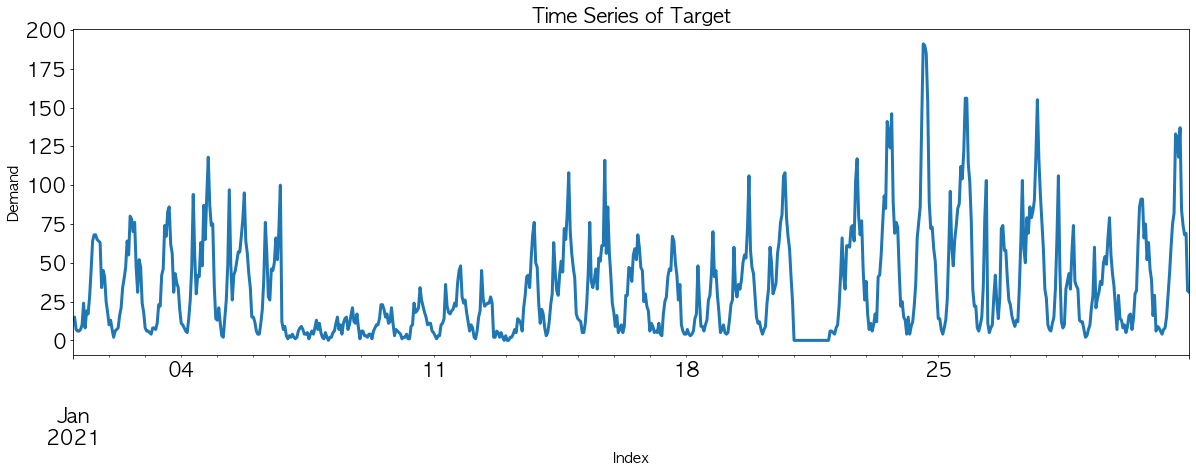

In [239]:
raw_all_gangdong['rent_count'].plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20)

plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()


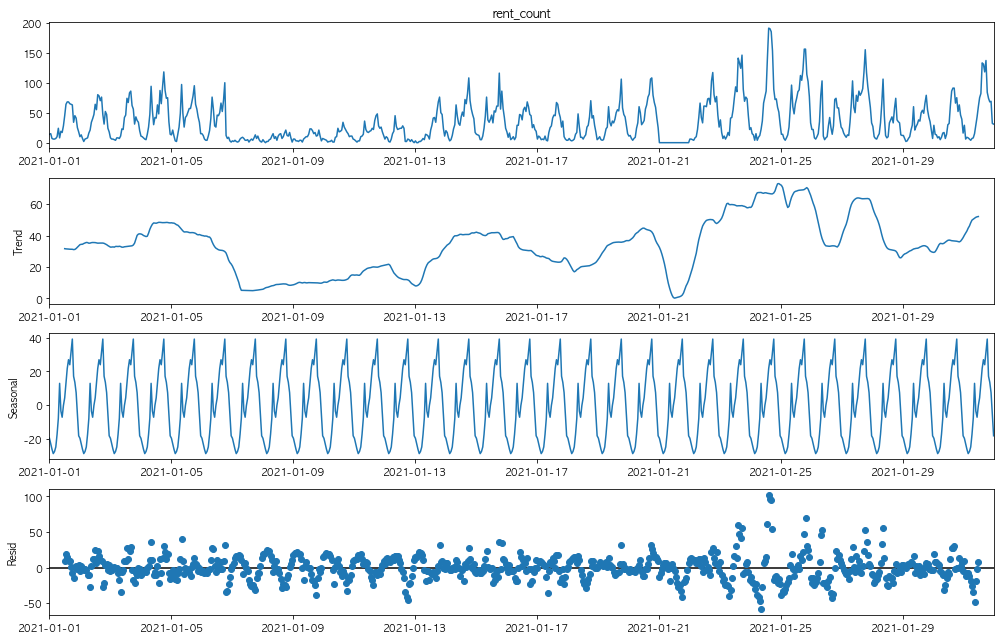

In [240]:
# plt.figure(figsize=(20,6))
plt.rcParams['figure.figsize'] = (14,9)
sm.tsa.seasonal_decompose(raw_all_gangdong['rent_count'], model='additive').plot()
plt.show()

In [241]:
result = sm.tsa.seasonal_decompose(raw_all_gangdong['rent_count'], model='additive')
result.trend[:20]

DateTime
2021-01-01 00:00:00     NaN
2021-01-01 01:00:00     NaN
2021-01-01 02:00:00     NaN
2021-01-01 03:00:00     NaN
2021-01-01 04:00:00     NaN
2021-01-01 05:00:00     NaN
2021-01-01 06:00:00     NaN
2021-01-01 07:00:00     NaN
2021-01-01 08:00:00     NaN
2021-01-01 09:00:00     NaN
2021-01-01 10:00:00     NaN
2021-01-01 11:00:00     NaN
2021-01-01 12:00:00   31.62
2021-01-01 13:00:00   31.50
2021-01-01 14:00:00   31.46
2021-01-01 15:00:00   31.37
2021-01-01 16:00:00   31.29
2021-01-01 17:00:00   31.29
2021-01-01 18:00:00   31.25
2021-01-01 19:00:00   31.04
Freq: H, Name: trend, dtype: float64

In [242]:
result.trend[-20:]

DateTime
2021-01-31 04:00:00   46.10
2021-01-31 05:00:00   48.15
2021-01-31 06:00:00   49.81
2021-01-31 07:00:00   50.46
2021-01-31 08:00:00   51.02
2021-01-31 09:00:00   51.60
2021-01-31 10:00:00   51.94
2021-01-31 11:00:00   52.10
2021-01-31 12:00:00     NaN
2021-01-31 13:00:00     NaN
2021-01-31 14:00:00     NaN
2021-01-31 15:00:00     NaN
2021-01-31 16:00:00     NaN
2021-01-31 17:00:00     NaN
2021-01-31 18:00:00     NaN
2021-01-31 19:00:00     NaN
2021-01-31 20:00:00     NaN
2021-01-31 21:00:00     NaN
2021-01-31 22:00:00     NaN
2021-01-31 23:00:00     NaN
Freq: H, Name: trend, dtype: float64

In [243]:
# (result.observed - result.trend - result.seasonal)[:20]
result.resid[:20]

DateTime
2021-01-01 00:00:00      NaN
2021-01-01 01:00:00      NaN
2021-01-01 02:00:00      NaN
2021-01-01 03:00:00      NaN
2021-01-01 04:00:00      NaN
2021-01-01 05:00:00      NaN
2021-01-01 06:00:00      NaN
2021-01-01 07:00:00      NaN
2021-01-01 08:00:00      NaN
2021-01-01 09:00:00      NaN
2021-01-01 10:00:00      NaN
2021-01-01 11:00:00      NaN
2021-01-01 12:00:00     9.12
2021-01-01 13:00:00    19.18
2021-01-01 14:00:00    14.79
2021-01-01 15:00:00     9.64
2021-01-01 16:00:00     9.72
2021-01-01 17:00:00     0.99
2021-01-01 18:00:00    -7.54
2021-01-01 19:00:00   -14.18
Freq: H, Name: resid, dtype: float64

In [244]:
result = sm.tsa.seasonal_decompose(raw_all_gangdong['rent_count'], model='additive')
Y_trend = pd.DataFrame(result.trend)
Y_trend.iloc[:]

,trend
DateTime,
2021-01-01 00:00:00,NaN
2021-01-01 01:00:00,NaN
2021-01-01 02:00:00,NaN
2021-01-01 03:00:00,NaN
2021-01-01 04:00:00,NaN
...,...
2021-01-31 19:00:00,NaN
2021-01-31 20:00:00,NaN
2021-01-31 21:00:00,NaN


In [245]:
Y_trend.fillna(method='ffill', inplace=True)
Y_trend.fillna(method='bfill', inplace=True)
Y_trend.columns = ['rent_trend']

In [246]:
Y_seasonal = pd.DataFrame(result.seasonal)
Y_seasonal.fillna(method='ffill', inplace=True)
Y_seasonal.fillna(method='bfill', inplace=True)
Y_seasonal.columns = ['rent_seasonal']

In [247]:
raw_all_gangdong = pd.concat([raw_all_gangdong, Y_trend, Y_seasonal], axis=1)

In [248]:
raw_all_gangdong

,rent_count,rent_trend,rent_seasonal
DateTime,,,
2021-01-01 00:00:00,14.00,31.62,-19.84
2021-01-01 01:00:00,15.00,31.62,-23.21
2021-01-01 02:00:00,7.00,31.62,-26.40
2021-01-01 03:00:00,6.00,31.62,-28.99
2021-01-01 04:00:00,6.00,31.62,-27.74
...,...,...,...
2021-01-31 19:00:00,74.00,52.10,17.14
2021-01-31 20:00:00,68.00,52.10,13.48
2021-01-31 21:00:00,69.00,52.10,7.33


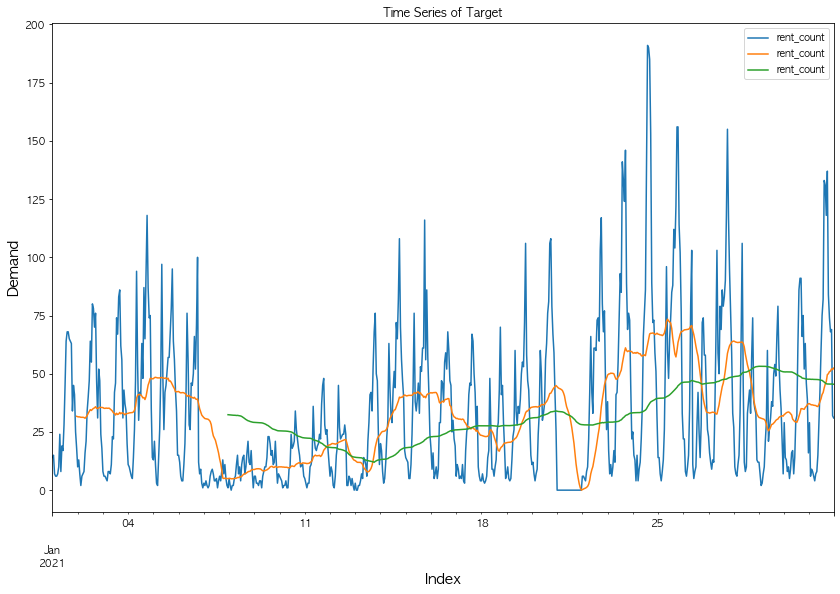

In [249]:
pd.concat([raw_all_gangdong['rent_count'],
          raw_all_gangdong[['rent_count']].rolling(24).mean(),
          raw_all_gangdong[['rent_count']].rolling(24*7).mean()], axis=1).          plot(kind='line')
plt.title('Time Series of Target')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

In [250]:
Y_count_Day = raw_all_gangdong[['rent_count']].rolling(24).mean()
Y_count_Day.fillna(method='ffill', inplace=True)
Y_count_Day.fillna(method='bfill', inplace=True)
Y_count_Day.columns = ['count_Day']

Y_count_Week = raw_all_gangdong[['rent_count']].rolling(24*7).mean()
Y_count_Week.fillna(method='ffill', inplace=True)
Y_count_Week.fillna(method='bfill', inplace=True)
Y_count_Week.columns = ['count_Week']

raw_all_gangdong = pd.concat([raw_all_gangdong, Y_count_Day], axis=1)
raw_all_gangdong = pd.concat([raw_all_gangdong, Y_count_Week], axis=1)

In [251]:
raw_all_gangdong

,rent_count,rent_trend,rent_seasonal,count_Day,count_Week
DateTime,,,,,
2021-01-01 00:00:00,14.00,31.62,-19.84,31.71,32.40
2021-01-01 01:00:00,15.00,31.62,-23.21,31.71,32.40
2021-01-01 02:00:00,7.00,31.62,-26.40,31.71,32.40
2021-01-01 03:00:00,6.00,31.62,-28.99,31.71,32.40
2021-01-01 04:00:00,6.00,31.62,-27.74,31.71,32.40
...,...,...,...,...,...
2021-01-31 19:00:00,74.00,52.10,17.14,50.92,45.58
2021-01-31 20:00:00,68.00,52.10,13.48,51.12,45.55
2021-01-31 21:00:00,69.00,52.10,7.33,52.08,45.61


### 차분

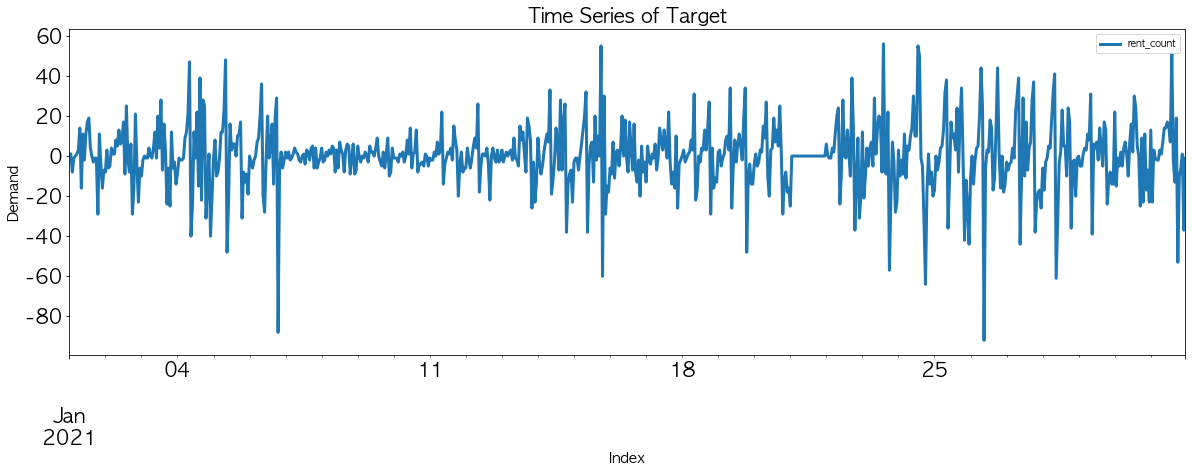

In [252]:
raw_all_gangdong[['rent_count']].diff().plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20)

plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()


In [253]:
Y_diff = raw_all_gangdong[['rent_count']].diff()
Y_diff.fillna(method='ffill', inplace=True)
Y_diff.fillna(method='bfill', inplace=True)
Y_diff.columns = ['count_diff']

In [254]:
raw_all_gangdong = pd.concat([raw_all_gangdong, Y_diff], axis=1)
raw_all_gangdong

,rent_count,rent_trend,rent_seasonal,count_Day,count_Week,count_diff
DateTime,,,,,,
2021-01-01 00:00:00,14.00,31.62,-19.84,31.71,32.40,1.00
2021-01-01 01:00:00,15.00,31.62,-23.21,31.71,32.40,1.00
2021-01-01 02:00:00,7.00,31.62,-26.40,31.71,32.40,-8.00
2021-01-01 03:00:00,6.00,31.62,-28.99,31.71,32.40,-1.00
2021-01-01 04:00:00,6.00,31.62,-27.74,31.71,32.40,0.00
...,...,...,...,...,...,...
2021-01-31 19:00:00,74.00,52.10,17.14,50.92,45.58,-10.00
2021-01-31 20:00:00,68.00,52.10,13.48,51.12,45.55,-6.00
2021-01-31 21:00:00,69.00,52.10,7.33,52.08,45.61,1.00


### 날짜 분리

In [255]:
raw_all_gangdong['DateTime'] = raw_all_gangdong.index

In [256]:
raw_all_gangdong['Year'] = raw_all_gangdong.DateTime.dt.year
raw_all_gangdong['Quarter'] = raw_all_gangdong.DateTime.dt.quarter
raw_all_gangdong['Day'] = raw_all_gangdong.DateTime.dt.day
raw_all_gangdong['DayofWeek'] = raw_all_gangdong.DateTime.dt.dayofweek
raw_all_gangdong

,rent_count,rent_trend,rent_seasonal,count_Day,count_Week,count_diff,DateTime,Year,Quarter,Day,DayofWeek
DateTime,,,,,,,,,,,
2021-01-01 00:00:00,14.00,31.62,-19.84,31.71,32.40,1.00,2021-01-01 00:00:00,2021,1,1,4
2021-01-01 01:00:00,15.00,31.62,-23.21,31.71,32.40,1.00,2021-01-01 01:00:00,2021,1,1,4
2021-01-01 02:00:00,7.00,31.62,-26.40,31.71,32.40,-8.00,2021-01-01 02:00:00,2021,1,1,4
2021-01-01 03:00:00,6.00,31.62,-28.99,31.71,32.40,-1.00,2021-01-01 03:00:00,2021,1,1,4
2021-01-01 04:00:00,6.00,31.62,-27.74,31.71,32.40,0.00,2021-01-01 04:00:00,2021,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31 19:00:00,74.00,52.10,17.14,50.92,45.58,-10.00,2021-01-31 19:00:00,2021,1,31,6
2021-01-31 20:00:00,68.00,52.10,13.48,51.12,45.55,-6.00,2021-01-31 20:00:00,2021,1,31,6
2021-01-31 21:00:00,69.00,52.10,7.33,52.08,45.61,1.00,2021-01-31 21:00:00,2021,1,31,6


In [257]:
raw_all_gangdong

,rent_count,rent_trend,rent_seasonal,count_Day,count_Week,count_diff,DateTime,Year,Quarter,Day,DayofWeek
DateTime,,,,,,,,,,,
2021-01-01 00:00:00,14.00,31.62,-19.84,31.71,32.40,1.00,2021-01-01 00:00:00,2021,1,1,4
2021-01-01 01:00:00,15.00,31.62,-23.21,31.71,32.40,1.00,2021-01-01 01:00:00,2021,1,1,4
2021-01-01 02:00:00,7.00,31.62,-26.40,31.71,32.40,-8.00,2021-01-01 02:00:00,2021,1,1,4
2021-01-01 03:00:00,6.00,31.62,-28.99,31.71,32.40,-1.00,2021-01-01 03:00:00,2021,1,1,4
2021-01-01 04:00:00,6.00,31.62,-27.74,31.71,32.40,0.00,2021-01-01 04:00:00,2021,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31 19:00:00,74.00,52.10,17.14,50.92,45.58,-10.00,2021-01-31 19:00:00,2021,1,31,6
2021-01-31 20:00:00,68.00,52.10,13.48,51.12,45.55,-6.00,2021-01-31 20:00:00,2021,1,31,6
2021-01-31 21:00:00,69.00,52.10,7.33,52.08,45.61,1.00,2021-01-31 21:00:00,2021,1,31,6


### ragged variables

In [258]:
raw_all_gangdong['rent_count_lag1'] = raw_all_gangdong['rent_count'].shift(1)
raw_all_gangdong['rent_count_lag2'] = raw_all_gangdong['rent_count'].shift(2)
raw_all_gangdong.head()

,rent_count,rent_trend,rent_seasonal,count_Day,count_Week,count_diff,DateTime,Year,Quarter,Day,DayofWeek,rent_count_lag1,rent_count_lag2
DateTime,,,,,,,,,,,,,
2021-01-01 00:00:00,14.00,31.62,-19.84,31.71,32.40,1.00,2021-01-01 00:00:00,2021,1,1,4,NaN,NaN
2021-01-01 01:00:00,15.00,31.62,-23.21,31.71,32.40,1.00,2021-01-01 01:00:00,2021,1,1,4,14.00,NaN
2021-01-01 02:00:00,7.00,31.62,-26.40,31.71,32.40,-8.00,2021-01-01 02:00:00,2021,1,1,4,15.00,14.00
2021-01-01 03:00:00,6.00,31.62,-28.99,31.71,32.40,-1.00,2021-01-01 03:00:00,2021,1,1,4,7.00,15.00
2021-01-01 04:00:00,6.00,31.62,-27.74,31.71,32.40,0.00,2021-01-01 04:00:00,2021,1,1,4,6.00,7.00


In [259]:
raw_all_gangdong['rent_count_lag1'].fillna(method='bfill', inplace=True)
raw_all_gangdong['rent_count_lag2'].fillna(method='bfill', inplace=True)
raw_all_gangdong.head()

,rent_count,rent_trend,rent_seasonal,count_Day,count_Week,count_diff,DateTime,Year,Quarter,Day,DayofWeek,rent_count_lag1,rent_count_lag2
DateTime,,,,,,,,,,,,,
2021-01-01 00:00:00,14.00,31.62,-19.84,31.71,32.40,1.00,2021-01-01 00:00:00,2021,1,1,4,14.00,14.00
2021-01-01 01:00:00,15.00,31.62,-23.21,31.71,32.40,1.00,2021-01-01 01:00:00,2021,1,1,4,14.00,14.00
2021-01-01 02:00:00,7.00,31.62,-26.40,31.71,32.40,-8.00,2021-01-01 02:00:00,2021,1,1,4,15.00,14.00
2021-01-01 03:00:00,6.00,31.62,-28.99,31.71,32.40,-1.00,2021-01-01 03:00:00,2021,1,1,4,7.00,15.00
2021-01-01 04:00:00,6.00,31.62,-27.74,31.71,32.40,0.00,2021-01-01 04:00:00,2021,1,1,4,6.00,7.00


### dummy

In [225]:
pd.get_dummies(raw_all_gangdong['Quarter'])

,1
DateTime,
2021-01-01 00:00:00,1
2021-01-01 01:00:00,1
2021-01-01 02:00:00,1
2021-01-01 03:00:00,1
2021-01-01 04:00:00,1
...,...
2021-01-31 19:00:00,1
2021-01-31 20:00:00,1
2021-01-31 21:00:00,1


In [264]:
raw_all_gangdong.shape

(744, 13)

### data split

In [263]:
Y_colname = ['rent_count']
X_remove = ['DateTime']
X_colname = [x for x in raw_all_gangdong.columns if x not in Y_colname+X_remove]
len(X_colname)

11

In [260]:
data_train = raw_all_gangdong.loc[raw_all_gangdong.index < '2021-01-29', :]
data_test = raw_all_gangdong.loc[raw_all_gangdong.index >= '2021-01-29', :]
print(data_train.shape, data_test.shape)

(672, 13) (72, 13)


In [261]:
data_train.index

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-01-28 14:00:00', '2021-01-28 15:00:00',
               '2021-01-28 16:00:00', '2021-01-28 17:00:00',
               '2021-01-28 18:00:00', '2021-01-28 19:00:00',
               '2021-01-28 20:00:00', '2021-01-28 21:00:00',
               '2021-01-28 22:00:00', '2021-01-28 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=672, freq='H')

In [262]:
data_test.index

DatetimeIndex(['2021-01-29 00:00:00', '2021-01-29 01:00:00',
               '2021-01-29 02:00:00', '2021-01-29 03:00:00',
               '2021-01-29 04:00:00', '2021-01-29 05:00:00',
               '2021-01-29 06:00:00', '2021-01-29 07:00:00',
               '2021-01-29 08:00:00', '2021-01-29 09:00:00',
               '2021-01-29 10:00:00', '2021-01-29 11:00:00',
               '2021-01-29 12:00:00', '2021-01-29 13:00:00',
               '2021-01-29 14:00:00', '2021-01-29 15:00:00',
               '2021-01-29 16:00:00', '2021-01-29 17:00:00',
               '2021-01-29 18:00:00', '2021-01-29 19:00:00',
               '2021-01-29 20:00:00', '2021-01-29 21:00:00',
               '2021-01-29 22:00:00', '2021-01-29 23:00:00',
               '2021-01-30 00:00:00', '2021-01-30 01:00:00',
               '2021-01-30 02:00:00', '2021-01-30 03:00:00',
               '2021-01-30 04:00:00', '2021-01-30 05:00:00',
               '2021-01-30 06:00:00', '2021-01-30 07:00:00',
               '2021-01-

In [265]:
Y_train = data_train[Y_colname]
X_train = data_train[X_colname]
Y_test = data_test[Y_colname]
X_test = data_test[X_colname]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(672, 11) (672, 1)
(72, 11) (72, 1)


In [267]:
X_train.head()

,rent_trend,rent_seasonal,count_Day,count_Week,count_diff,Year,Quarter,Day,DayofWeek,rent_count_lag1,rent_count_lag2
DateTime,,,,,,,,,,,
2021-01-01 00:00:00,31.62,-19.84,31.71,32.40,1.00,2021,1,1,4,14.00,14.00
2021-01-01 01:00:00,31.62,-23.21,31.71,32.40,1.00,2021,1,1,4,14.00,14.00
2021-01-01 02:00:00,31.62,-26.40,31.71,32.40,-8.00,2021,1,1,4,15.00,14.00
2021-01-01 03:00:00,31.62,-28.99,31.71,32.40,-1.00,2021,1,1,4,7.00,15.00
2021-01-01 04:00:00,31.62,-27.74,31.71,32.40,0.00,2021,1,1,4,6.00,7.00


In [268]:
Y_train.head()

,rent_count
DateTime,
2021-01-01 00:00:00,14.00
2021-01-01 01:00:00,15.00
2021-01-01 02:00:00,7.00
2021-01-01 03:00:00,6.00
2021-01-01 04:00:00,6.00
